# Determining the Best Language for Discrimination from English Using the Negative Selection Algorithm

## Import Libraries
Import the necessary libraries for the analysis.

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

## Define Function to Compute AUC
This function computes the Area Under the ROC Curve (AUC) for comparing English strings against strings from another language. It reads anomaly scores from text files, calculates True Positive Rate (TPR) and False Positive Rate (FPR), and computes the AUC score.

In [27]:
def compute_auc(english_txt, tagalog_txt):
    # Initialize a list to hold score-label pairs
    scores_with_labels = []
    
    # Read English scores and label them 0 (normal)
    with open(english_txt, 'r') as file:
        for line in file:
            scores_with_labels.append([float(line.strip()), 0])
    
    # Read Tagalog (or other language) scores and label them 1 (anomalous)
    with open(tagalog_txt, 'r') as file:
        for line in file:
            scores_with_labels.append([float(line.strip()), 1])
    
    # Sort scores for ROC computation
    scores_with_labels.sort(key=lambda x: x[0])
    
    # Separate scores and labels
    scores = [pair[0] for pair in scores_with_labels]
    labels = [pair[1] for pair in scores_with_labels]
    
    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(labels, scores)
    auc_score = roc_auc_score(labels, scores)
    
    return fpr, tpr, auc_score     

## Define Function to Plot ROC Curve
This function plots the ROC curve using FPR and TPR values obtained from the compute_auc function. It highlights the discrimination capability of the negative selection algorithm between English and another language.

In [28]:
def plot_roc_curve(fpr, tpr, roc_auc, r, language):
    """
    Function to plot ROC curve
    """
    plt.figure(figsize=(10, 8))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    plt.title(f'{language} Discrimination from English ROC (n=10, r={r})')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

## Generating Anomaly Scores

The anomaly scores for both English and the other 4 languages datasets were generated using the Negative Selection Algorithm, executed with `n = 10` and `r = 3`. The scores were outputted to text files for subsequent analysis. Below are the commands used:

- **For English dataset**:
    ```bash
    java -jar negsel2.jar -self english.train -n 10 -r 3 -c -l < english.test > n10r3_english.txt
    ```
- **For Hiligaynon dataset**:
    ```bash
    java -jar negsel2.jar -self english.train -n 10 -r 3 -c -l < hiligaynon.txt > n10r3_hiligaynon.txt
    ```
- **For Middle-English dataset**:
    ```bash
    java -jar negsel2.jar -self english.train -n 10 -r 3 -c -l < middle-english.txt > n10r3_middle-english.txt
    ```
- **For Plautdietsch dataset**:
    ```bash
    java -jar negsel2.jar -self english.train -n 10 -r 3 -c -l < plautdietsch.txt > n10r3_plautdietsch.txt
    ```
- **For Xhosa dataset**:
    ```bash
    java -jar negsel2.jar -self english.train -n 10 -r 3 -c -l < xhosa.txt > n10r3_xhosa.txt
    ```
**Now, with the generated text files containing the scores for each r value and each language, we are ready to proceed with the analysis.**


## Perform AUC Computations and Plotting for Each Language
In the following cells, we compute the AUC and plot the ROC curve for each language comparison. This analysis aims to determine which language can be best discriminated from English and which is the most difficult, using the negative selection algorithm.

### Hiligaynon

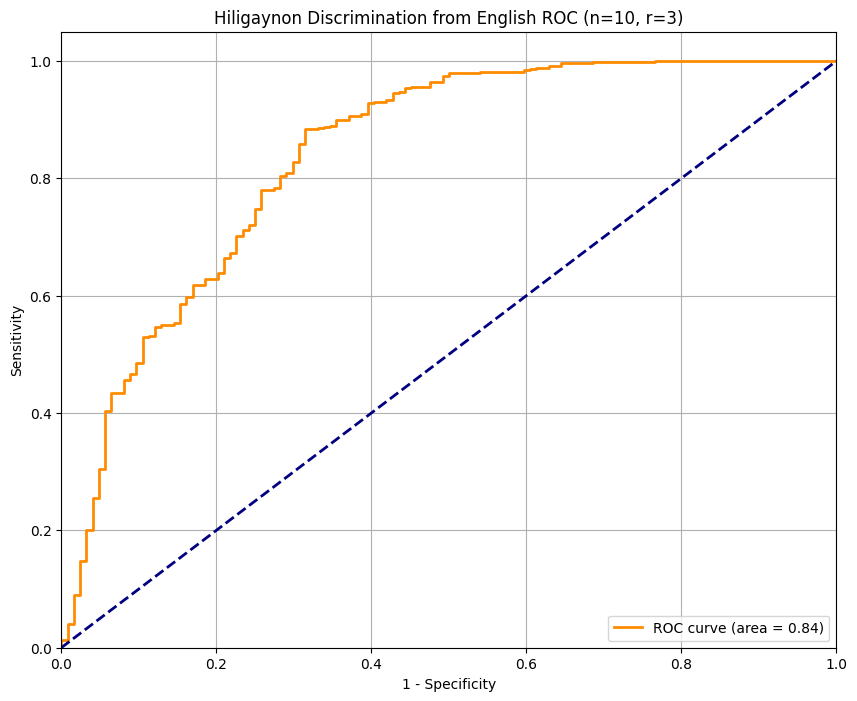

In [29]:
fpr_hiligaynon, tpr_hiligaynon, auc_hiligaynon = compute_auc('scores/n10r3_english.txt', 'scores/n10r3_hiligaynon.txt')
plot_roc_curve(fpr_hiligaynon, tpr_hiligaynon, auc_hiligaynon, 3, 'Hiligaynon')

### Middle English

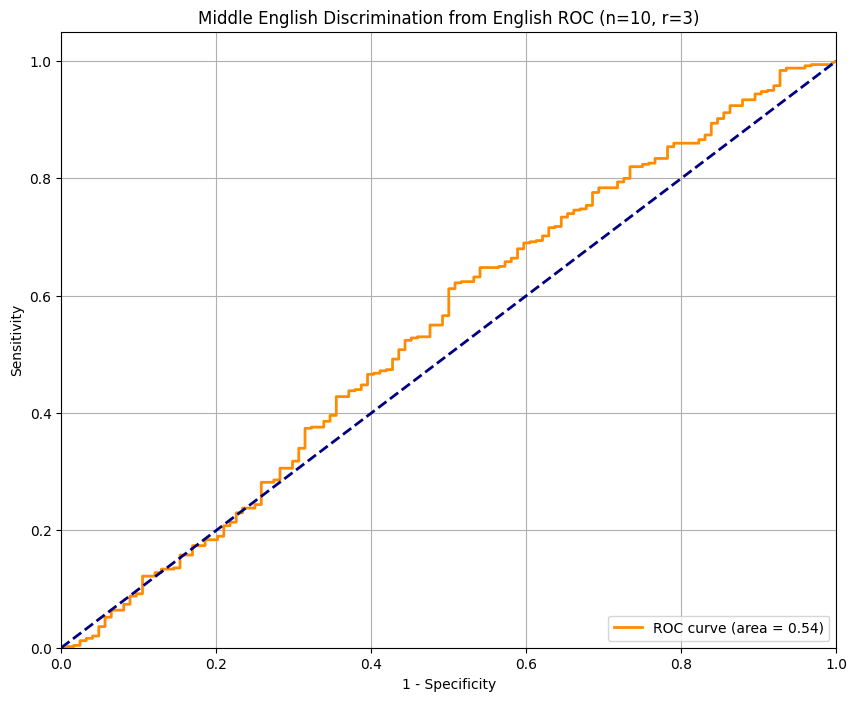

In [30]:
fpr_middle, tpr_middle, auc_middle = compute_auc('scores/n10r3_english.txt', 'scores/n10r3_middle_english.txt')
plot_roc_curve(fpr_middle, tpr_middle, auc_middle, 3, 'Middle English')

### Plautdietsch

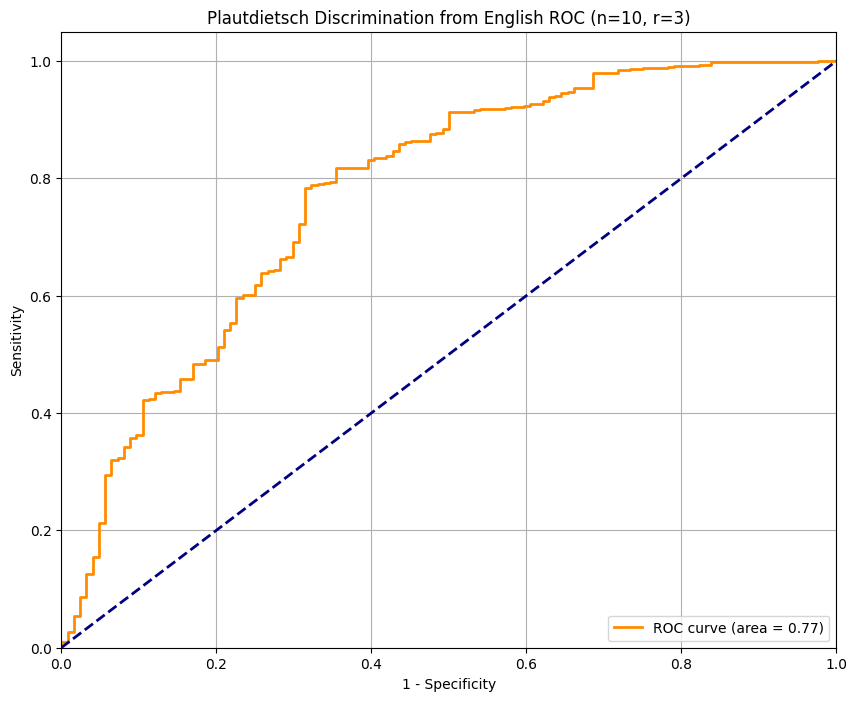

In [31]:
fpr_plautdietsch, tpr_plautdietsch, auc_plautdietsch = compute_auc('scores/n10r3_english.txt', 'scores/n10r3_plautdietsch.txt')
plot_roc_curve(fpr_plautdietsch, tpr_plautdietsch, auc_plautdietsch, 3, 'Plautdietsch')

### Xhosa

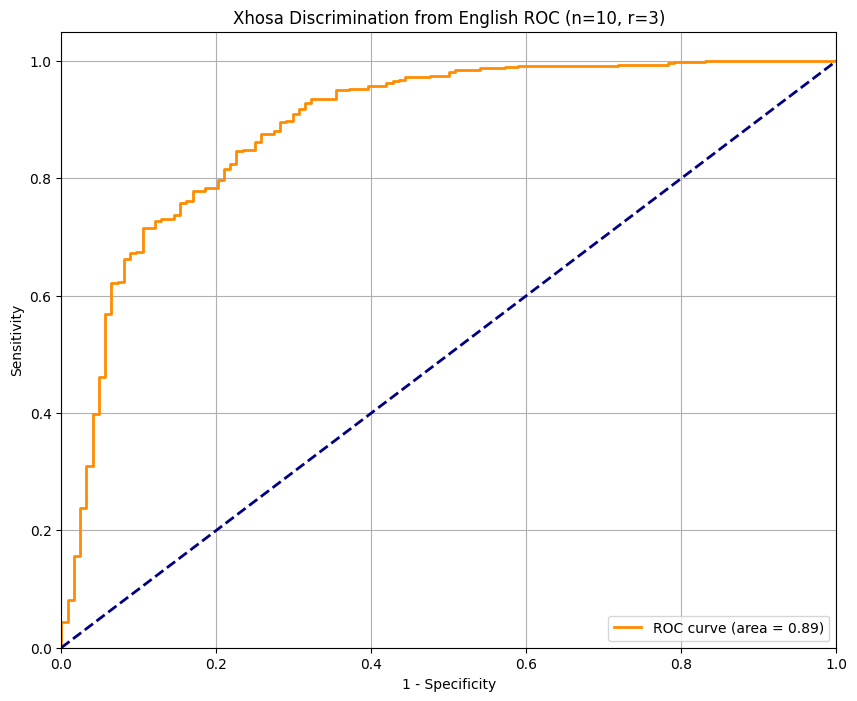

In [32]:
fpr_xhosa, tpr_xhosa, auc_xhosa = compute_auc('scores/n10r3_english.txt', 'scores/n10r3_xhosa.txt')
plot_roc_curve(fpr_xhosa, tpr_xhosa, auc_xhosa, 3, 'Xhosa')

## Analysis of results
**Xhosa** and **Hiligaynon** were the best discriminated languages from English, with AUC scores over 0.89 and 0.84 respectively. **Plautdiesch** followed with a score of 0.77, likely due to linguistic similarities with English as both are Germanic languages. **Middle-English**, sharing a direct historical lineage with modern English, resulted in an AUC score of 0.54, indicating nearly random classification performance by the algorithm. This highlights the challenge of distinguishing closely related languages and emphasizes the effectiveness of the algorithm for more distinct language pairs.